# **que1**

1. import all the needed libraries


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

2. write the binomial function;

  2.1. funciton patrameters: we will get n, p, and the size(optional) to get  size-time bin(n, p) instances.

  2.2. the funciton creates a 2d array that is all the bernouli distribution instances of each p

  2.4 return value: an dictionary with key's being the each p value and the value is an array of size=size that will demonstrate all the succeses of each bin(n, p)

In [ ]:
def my_binomial(n: int, p: list, size=1) -> dict:
    dict_all_p = dict()
    for each_p in p:
        # Generate a 2D array of n*m Bernoulli distribution instances using broadcasting
        bernoulli_instances = np.random.choice([0, 1], size=(n, size), p=[1-each_p, each_p])

        # Calculate the sum of each row
        successes_of_all_instances = np.sum(bernoulli_instances, axis=0)

        # saving each p's data
        dict_all_p[each_p] = successes_of_all_instances
    return dict_all_p

3. write a executive funciton

  3.1. function parameters: all succeses of each instances of each p

  3.2. calculate each p's variance(VAR[X]) and average(E[X]) theory based and experimental based

  3.3.return value: a dictionary with p as key and variance(VAR[X]) and average(E[X]) theory based and experimental based as its values


In [ ]:
def calculate_data(dict_each_p_successes: dict, p_list: list, n: int):
    dict_avg_theory = dict()
    dict_avg_expr = dict()
    dict_var_theory = dict()
    dict_var_expr = dict()

    for p in p_list:
        temp_arr = np.array(dict_each_p_successes[p])
        dict_avg_theory[p] = n * p
        dict_avg_expr[p] = np.mean(temp_arr)

        dict_var_theory[p] = n * p * (1 - p)
        dict_var_expr[p] = np.var(temp_arr)

    return dict_avg_theory, dict_avg_expr, dict_var_theory, dict_var_expr


4. write a funciton to draw chart(bar grath) and compare the calculated var and mean

In [ ]:
def compare_lists(dict_list1, dict_list2, title=
"Comparison of experimental and theoretical average/variance", my_type='num of successes'):

    # Check's if the lists have the same length
    if len(dict_list1) != len(dict_list2):
        raise ValueError("Lists must have the same length")

    # Creates the bar plot
    plt.figure()

    width = 0.002  # sets the width of the bars
    bar1 = plt.bar(dict_list1.keys(), dict_list1.values(), width, label='theory')
    bar2 = plt.bar([x + width for x in dict_list2.keys()], dict_list2.values(), width,
            label='experiment')  # shifts the second list's bars by the width of the first list's bars

    plt.xlabel("Probability")
    plt.title(title)
    plt.grid(True)
    plt.legend()
    plt.show()

5. my main to execute all the functions and draws two chs=art for each average and variance

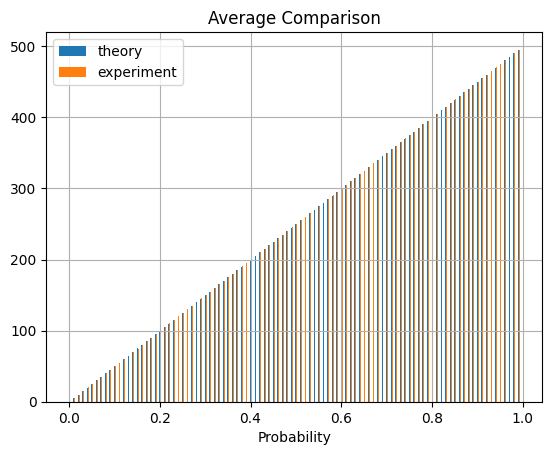

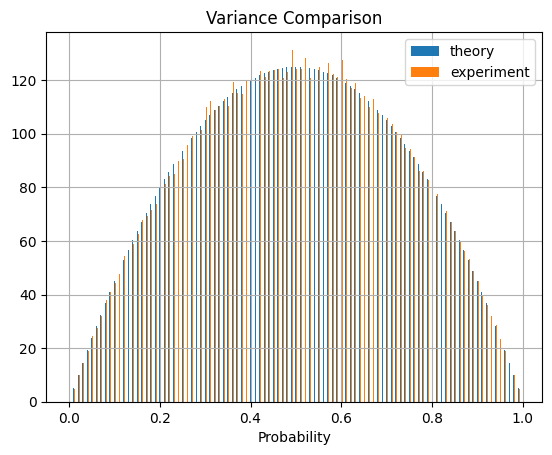

In [ ]:
def my_main():
    dict_all_p = my_binomial(n=500, p=[x / 100 for x in range(100)], size=5000)
    dict_avg_theory, dict_avg_expr, dict_var_theory, dict_var_expr =\
        calculate_data(dict_all_p, p_list=[x / 100 for x in range(100)], n=500)
    compare_lists(dict_avg_theory, dict_avg_expr, title='Average Comparison')
    compare_lists(dict_var_theory, dict_var_expr, title='Variance Comparison')


my_main()

As you can see from the graphs, both the Variance and the Average are very similar comparing the theoretical and the experimental of the respected parts; their so, we will be using the theoretical form in our problems that we want to solve becuase it'll give us the nearest value to the real outcome that we would get if we had done the experiment